In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow

import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 15s 242us/sample - loss: 0.2997 - accuracy: 0.9128
Epoch 2/5
60000/60000 [==============================] - 8s 136us/sample - loss: 0.1453 - accuracy: 0.9563
Epoch 3/5
60000/60000 [==============================] - 9s 144us/sample - loss: 0.1076 - accuracy: 0.9670
Epoch 4/5
60000/60000 [==============================] - 9s 146us/sample - loss: 0.0886 - accuracy: 0.9729
Epoch 5/5
60000/60000 [==============================] - 10s 169us/sample - loss: 0.0761 - accuracy: 0.9760- loss: 0.0764 - accu
10000/1 - 2s - loss: 0.0362 - accuracy: 0.9778


[0.0707901567925699, 0.9778]

In [5]:
# TensorFlow Version
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [6]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

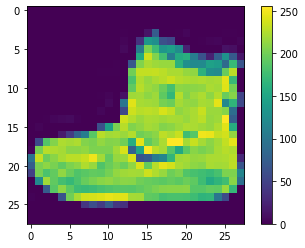

In [13]:
%matplotlib inline
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images = train_images / 255.0

test_images = test_images / 255.0

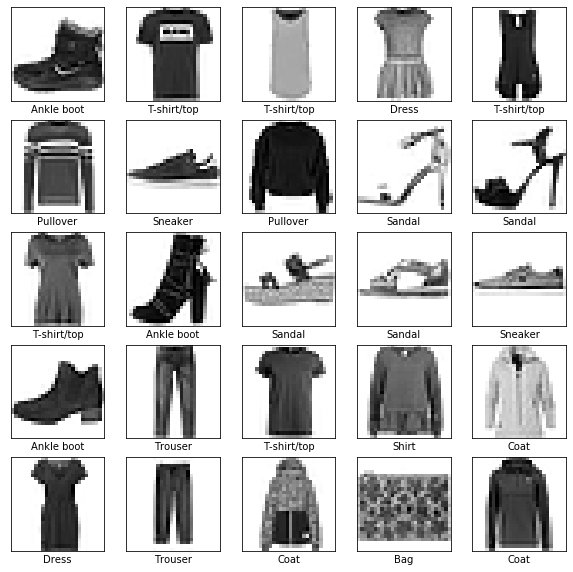

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 138us/sample - loss: 0.4992 - accuracy: 0.8253
Epoch 2/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.3755 - accuracy: 0.8647
Epoch 3/10
60000/60000 [==============================] - 10s 164us/sample - loss: 0.3388 - accuracy: 0.8763
Epoch 4/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.3136 - accuracy: 0.8847
Epoch 5/10
60000/60000 [==============================] - 11s 184us/sample - loss: 0.2949 - accuracy: 0.8911- loss: 0.2957 - 
Epoch 6/10
60000/60000 [==============================] - 11s 184us/sample - loss: 0.2815 - accuracy: 0.8951
Epoch 7/10
60000/60000 [==============================] - 11s 191us/sample - loss: 0.2684 - accuracy: 0.9004
Epoch 8/10
60000/60000 [==============================] - 11s 181us/sample - loss: 0.2561 - accuracy: 0.9041
Epoch 9/10
60000/60000 [==============================] - 10s 167us/sample - loss: 0.2464 -

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.2683 - accuracy: 0.8849

Test accuracy: 0.8849


In [20]:
predictions = model.predict(test_images)

In [21]:
predictions[0]

array([2.1093101e-06, 1.4687404e-10, 9.2592527e-06, 2.1220210e-10,
       1.3640457e-07, 3.3455191e-03, 3.7303134e-06, 4.2889016e-03,
       5.3842547e-07, 9.9234980e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [23]:
test_labels[0]

9

In [24]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

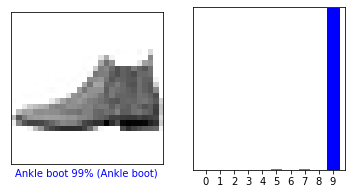

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

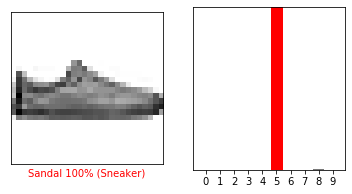

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

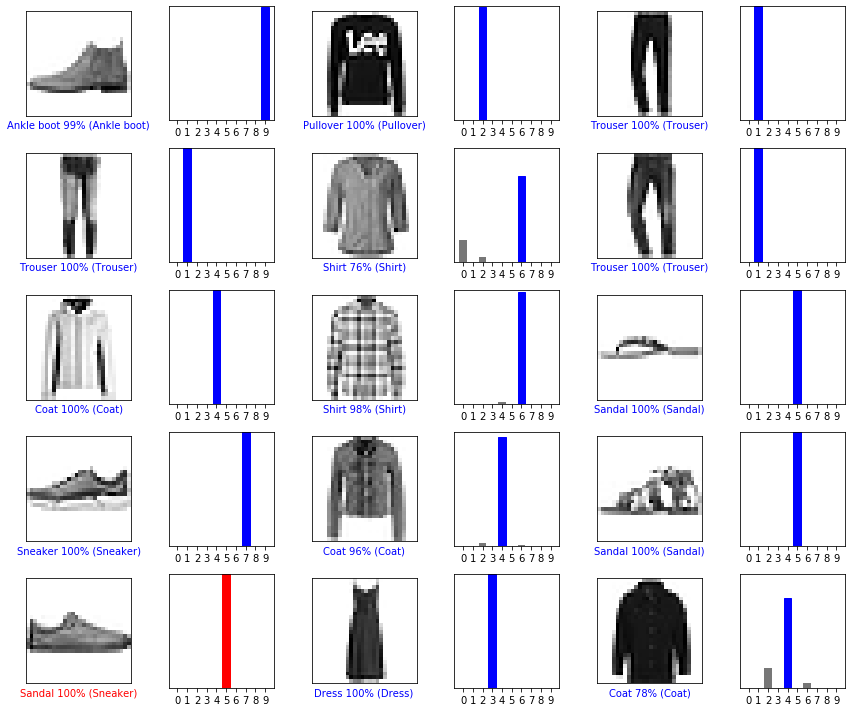

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [28]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [29]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [30]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.8343952e-04 5.8079941e-13 9.9843031e-01 2.0254161e-11 1.3084982e-03
  3.5265211e-15 7.7749442e-05 3.0482388e-22 3.9874115e-13 1.7480778e-14]]


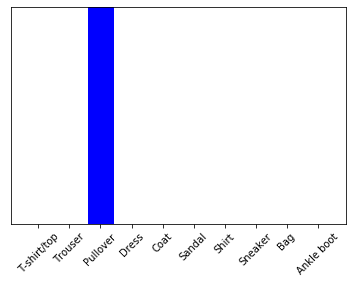

In [31]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [32]:
np.argmax(predictions_single[0])

2

In [33]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.